In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn .metrics import classification_report , accuracy_score , confusion_matrix



In [51]:
card_details = pd.read_csv("creditcard.csv")

In [8]:
card_details.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
card_details.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [54]:
card_details.isnull().sum() #checking  missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [55]:
#Checking the number of legitimate and fraudulent transactions
card_details["Class"].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
# 284315 transaction is legit and 492 is unbalanced means data set highly balanced

In [56]:
authentic = card_details[card_details.Class==0]
fraudulent = card_details[card_details.Class ==1]

In [57]:
print(authentic.shape)
print(fraudulent.shape)

(284315, 31)
(492, 31)


In [58]:
#checking measures of the data
authentic.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [59]:
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [60]:
card_details.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


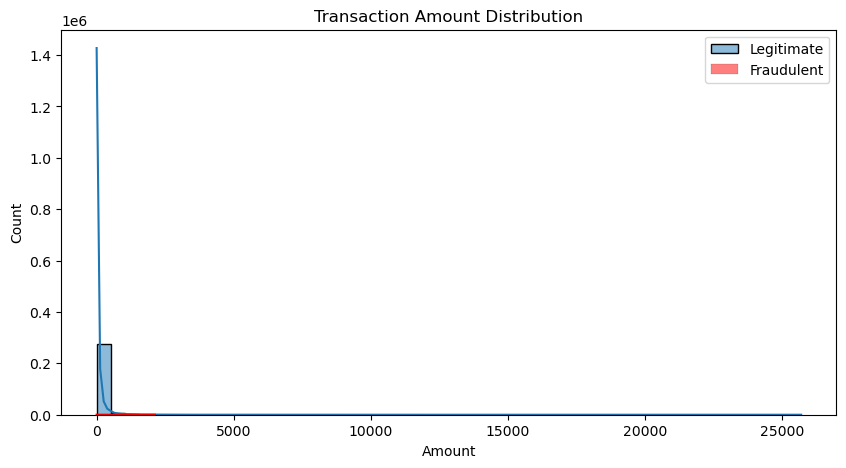

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(authentic.Amount, bins=50, kde=True, label='Legitimate')
sns.histplot(fraudulent.Amount, bins=50, kde=True, color='red', label='Fraudulent')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.show()

In [17]:
#we will take a sample data set make same amount of legit transaction and fraudulent transaction

In [61]:
authentic_random_sample = authentic.sample(n=492)

In [62]:
combined_dataset = pd.concat([authentic_random_sample,fraudulent],axis=0)

In [63]:
combined_dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
143612,85481.0,-1.373274,1.384824,1.809048,1.497184,0.090969,-0.194045,0.838099,0.465049,-1.752773,...,0.002882,-0.386005,0.045498,0.363451,0.307446,-0.260503,-0.121294,-0.007433,72.72,0
3448,2939.0,-0.459109,0.570445,1.166147,-2.145477,0.257543,-0.842267,0.952155,-0.132514,0.657459,...,0.145480,0.764352,-0.245735,0.211536,-0.079599,-0.837597,0.247430,-0.026640,1.00,0
234299,147915.0,-0.360613,0.344340,1.469412,-0.441719,0.063173,0.286498,0.006701,0.335468,0.392283,...,0.323161,0.978761,-0.199596,0.765778,-0.320244,-0.223576,0.183785,0.170110,8.46,0
214206,139577.0,1.983217,-0.258404,-1.192303,-0.110967,0.221005,-0.267157,-0.015698,-0.117206,0.214136,...,-0.434497,-1.365006,0.361493,-1.062316,-0.605254,0.056238,-0.076447,-0.058154,53.21,0
156800,108936.0,-0.598146,0.957162,2.369403,-0.134143,0.097672,-0.311308,0.610028,-0.354320,1.495190,...,-0.290582,-0.386186,-0.316979,-0.040954,0.267764,-0.744994,-0.203260,-0.150557,10.47,0


In [64]:
combined_dataset["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

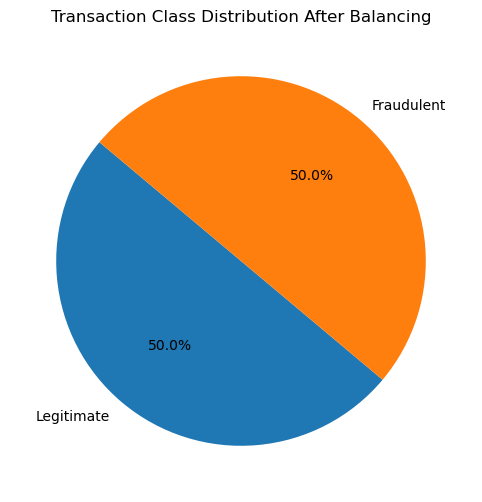

In [65]:
class_counts = combined_dataset["Class"].value_counts()  # Added this line
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title("Transaction Class Distribution After Balancing")
plt.show()

In [66]:
combined_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93301.904472,0.065648,0.149458,-0.043486,0.109918,0.099257,0.029766,0.028359,0.033998,0.015996,...,-0.004895,-0.000987,0.046034,0.012469,-0.046691,0.018656,0.040157,-0.025688,0.001596,73.580407
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [67]:
p = combined_dataset.drop(columns = "Class",axis =0 )
p

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
143612,85481.0,-1.373274,1.384824,1.809048,1.497184,0.090969,-0.194045,0.838099,0.465049,-1.752773,...,-0.080081,0.002882,-0.386005,0.045498,0.363451,0.307446,-0.260503,-0.121294,-0.007433,72.72
3448,2939.0,-0.459109,0.570445,1.166147,-2.145477,0.257543,-0.842267,0.952155,-0.132514,0.657459,...,-0.040018,0.145480,0.764352,-0.245735,0.211536,-0.079599,-0.837597,0.247430,-0.026640,1.00
234299,147915.0,-0.360613,0.344340,1.469412,-0.441719,0.063173,0.286498,0.006701,0.335468,0.392283,...,-0.079240,0.323161,0.978761,-0.199596,0.765778,-0.320244,-0.223576,0.183785,0.170110,8.46
214206,139577.0,1.983217,-0.258404,-1.192303,-0.110967,0.221005,-0.267157,-0.015698,-0.117206,0.214136,...,-0.000593,-0.434497,-1.365006,0.361493,-1.062316,-0.605254,0.056238,-0.076447,-0.058154,53.21
156800,108936.0,-0.598146,0.957162,2.369403,-0.134143,0.097672,-0.311308,0.610028,-0.354320,1.495190,...,0.065157,-0.290582,-0.386186,-0.316979,-0.040954,0.267764,-0.744994,-0.203260,-0.150557,10.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [68]:
q = combined_dataset["Class"]
q


143612    0
3448      0
234299    0
214206    0
156800    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [69]:
p_train, p_test , q_train , q_test = train_test_split(p,q,test_size = 0.2,stratify = q,random_state = 2 )

In [38]:
# train our model (logistic Regression)

In [70]:
training_model = LogisticRegression()
training_model.fit(p_train,q_train)

LogisticRegression()

In [77]:
#accuracy on training data  

p_training_prediction = training_model.predict(p_train)
training_accuracy = accuracy_score(p_training_prediction , q_train)

In [72]:
print("accuracy of training data",training_accuracy)

accuracy of training data 0.9199491740787802


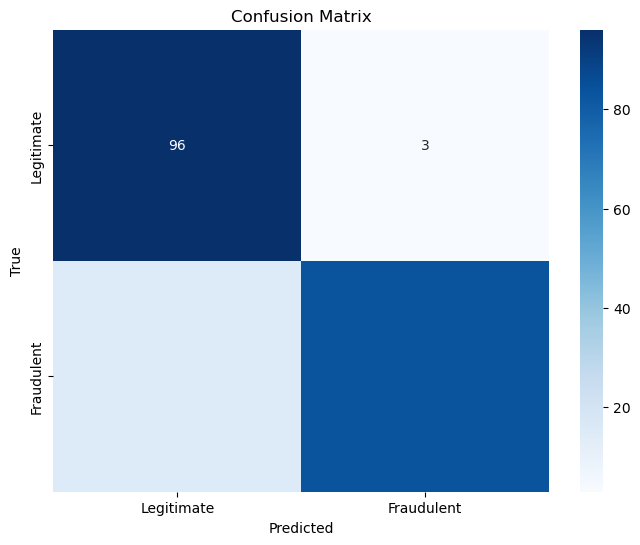

In [73]:
 #Visualization of confusion matrix (new lines added)
cm = confusion_matrix(q_test, p_testing_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()


In [74]:
#accuracy on testing data

p_testing_prediction = training_model.predict(p_test)

testing_accuracy = accuracy_score(p_testing_prediction,q_test)


In [76]:
print("accuracy of testing data ", testing_accuracy)

accuracy of testing data  0.868020304568528
